<a href="https://colab.research.google.com/github/yeon524/IDS/blob/main/TA_%EB%94%A5%EB%9F%AC%EB%8B%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/yeon524/kpop-lyrics-analytics/main/datasets/lyrics_by_year_1964_2023.csv"

df = pd.read_csv(url)
df.head()


,id,year,title,singer,lyric,x_rated
0,30072384,1964,워싱턴광장,정 시스터즈,NaN,False
1,8150699,1964,황혼의 에레지,최양숙,NaN,False
2,5758967,1964,물새우는 해변,권혜경,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,False
3,4083218,1964,내일또 만납시다,금호동,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,False
4,3622464,1964,밀짚모자 목장아가씨,박재란,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,False


In [1]:
!pip install transformers accelerate torch --quiet

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "dlckdfuf141/korean-emotion-kluebert-v2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

emotion_pipe = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    top_k=None  # 여러 감정 점수 다 보고 싶으면
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Device set to use cpu


In [4]:
lyric = "사랑이 식어버린 줄도 모르고 나는 계속 웃고만 있었네"

emotion_pipe(lyric)


[[{'label': 5, 'score': 0.9958661794662476},
  {'label': 3, 'score': 0.0037808907218277454},
  {'label': 4, 'score': 0.00022838621225673705},
  {'label': 6, 'score': 5.640219751512632e-05},
  {'label': 1, 'score': 2.7241487259743735e-05},
  {'label': 2, 'score': 2.3642051019123755e-05},
  {'label': 0, 'score': 1.729602081468329e-05}]]

In [9]:
import re

def clean_for_dl(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"\[.*?\]", " ", text)   # [Chorus] 같은 패턴 삭제
    text = re.sub(r"\(.*?\)", " ", text)   # (Hook) 같은 패턴 삭제
    text = text.replace("\\n", " ")        # \n 같은 문자 공백으로
    text = re.sub(r"\s+", " ", text)       # 연속 공백 정리
    return text.strip()

df["lyric_dl"] = df["lyric"].apply(clean_for_dl)
df[["title", "lyric_dl"]].head()

,title,lyric_dl
0,워싱턴광장,
1,황혼의 에레지,
2,물새우는 해변,고요한 밤하늘에 별이 잠들고 밀리는 파도소리 나혼자 들으며 외로히 홀로 날으는 물새...
3,내일또 만납시다,하루의 일을 끝내고 돌아가는 거리엔 사람의 물결 하늘엔 별이 하나 둘 반짝이면 가로...
4,밀짚모자 목장아가씨,시원한 밀짚모자 포플라 그늘에 양떼를 몰고가는 목장의 아가씨 연분홍 빛 입술에는 살...


In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "dlckdfuf141/korean-emotion-kluebert-v2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

emotion_pipe = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    top_k=None
)


Device set to use cpu


In [13]:
import re

def clean_for_dl(text):
    if not isinstance(text, str):
        return ""

    # [Chorus], [Hook], [Verse 1] 같은 것 제거
    text = re.sub(r"\[.*?\]", " ", text)

    # (Chorus), (Hook) 같은 괄호 제거
    text = re.sub(r"\(.*?\)", " ", text)

    # \n 이라는 문자열 → 공백
    text = text.replace("\\n", " ")
    text = text.replace("\n", " ")

    # 여러 공백 → 하나로 정리
    text = re.sub(r"\s+", " ", text)

    return text.strip()

In [14]:
df["lyric_dl"] = df["lyric"].apply(clean_for_dl)

In [15]:
id2label = {
    0: "공포",
    1: "놀람",
    2: "분노",
    3: "슬픔",
    4: "중립",
    5: "행복",
    6: "혐오",
}


In [18]:
def predict_emotion(text):
    if not isinstance(text, str) or text.strip() == "":
        return None

    text = text[:400]

    results = emotion_pipe(text, top_k=None)

    # 2중 리스트 형태일 경우: [[{...}, {...}]]
    if isinstance(results, list) and len(results) > 0 and isinstance(results[0], list):
        results = results[0]

    # 이제 반드시 list[dict] 형태
    if not isinstance(results, list) or len(results) == 0:
        return None

    best = max(results, key=lambda x: x["score"])
    return id2label[int(best["label"])]


In [21]:
df_sample = df.sample(100, random_state=42).copy()
df_sample.shape

(100, 7)

In [23]:
df_sample[["title", "emotion_dl"]].head(20)

,title,emotion_dl
3307,시간이 지나면,슬픔
2699,순간을 믿어요,슬픔
3423,끝사랑,슬픔
23,위를 보고 걷자,None
1175,나 너 그리고 우리,None
2603,목포의 눈물,슬픔
1255,바람에 옷깃이 날리듯,슬픔
1915,우리의 밤은 당신의 낮보다 아름답다,행복
4504,MY BAG,혐오
501,환상,중립


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46373 (\N{HANGUL SYLLABLE DIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

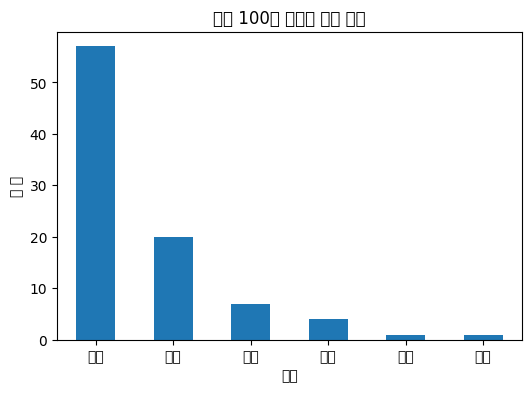

In [24]:
import matplotlib.pyplot as plt

# None(분류 안 된 것) 빼고 보기
emotion_counts = df_sample["emotion_dl"].dropna().value_counts()

plt.figure(figsize=(6,4))
emotion_counts.plot(kind="bar")

plt.title("샘플 100곡 딥러닝 감정 분포")
plt.xlabel("감정")
plt.ylabel("곡 수")
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-518885432.py:21: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-518885432.py:21: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-518885432.py:21: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-518885432.py:21: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-518885432.py:21: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-518885432.py:21: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-518885432.py:21: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/t

<Figure size 800x500 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

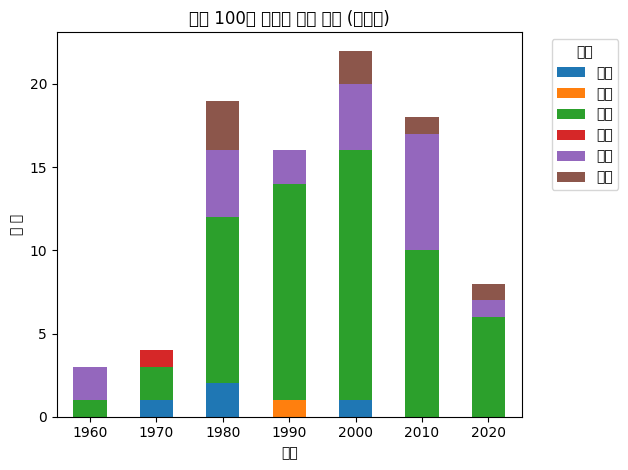

In [25]:
# 10년 단위 decade 컬럼 만들기
df_sample["decade"] = (df_sample["year"] // 10) * 10

# None 제거
tmp = df_sample.dropna(subset=["emotion_dl"]).copy()

emotion_by_decade = (
    tmp.groupby(["decade", "emotion_dl"])
       .size()
       .unstack(fill_value=0)
       .sort_index()
)

plt.figure(figsize=(8,5))
emotion_by_decade.plot(kind="bar", stacked=True)
plt.title("샘플 100곡 연대별 감정 분포 (딥러닝)")
plt.xlabel("연대")
plt.ylabel("곡 수")
plt.xticks(rotation=0)
plt.legend(title="감정", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [26]:
df_sample["emotion_dl"].value_counts(dropna=False)

,count
emotion_dl,
슬픔,57
행복,20
None,10
혐오,7
공포,4
중립,1
분노,1


In [27]:
pd.crosstab(df_sample["decade"], df_sample["emotion_dl"])

emotion_dl,공포,분노,슬픔,중립,행복,혐오
decade,,,,,,
1960,0,0,1,0,2,0
1970,1,0,2,1,0,0
1980,2,0,10,0,4,3
1990,0,1,13,0,2,0
2000,1,0,15,0,4,2
2010,0,0,10,0,7,1
2020,0,0,6,0,1,1


In [28]:
tmp = df_sample.dropna(subset=["emotion_dl"]).copy()
tmp["decade"] = (tmp["year"] // 10) * 10

emotion_ratio = (
    tmp.groupby(["decade", "emotion_dl"])
       .size()
       .groupby(level=0).apply(lambda x: x / x.sum())
       .unstack()
       .fillna(0)
)

emotion_ratio


,emotion_dl,공포,분노,슬픔,중립,행복,혐오
decade,decade,,,,,,
1960,1960,0.000000,0.0000,0.333333,0.00,0.666667,0.000000
1970,1970,0.250000,0.0000,0.500000,0.25,0.000000,0.000000
1980,1980,0.105263,0.0000,0.526316,0.00,0.210526,0.157895
1990,1990,0.000000,0.0625,0.812500,0.00,0.125000,0.000000
2000,2000,0.045455,0.0000,0.681818,0.00,0.181818,0.090909
2010,2010,0.000000,0.0000,0.555556,0.00,0.388889,0.055556
2020,2020,0.000000,0.0000,0.750000,0.00,0.125000,0.125000
